# ggplot2 και seaborn Β'

Προσαρμογή του κεφαλαίου 3 του βιβλίου των Hadley Wickham και Garrett Grolemund [R for Data Science](https://r4ds.had.co.nz/) (https://r4ds.had.co.nz/data-visualisation.html).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [9]:
%matplotlib inline

import pandas as pd
from plotnine import *
import seaborn as sns

* Πάμε σε ένα διαφορετικό σύνολο δεδομένων, το οποίο επίσης περιλαμβάνεται στο ggplot2.

* Τα δεδομένα αυτά αφορούν χαρακτηριστικά και τιμές διαμαντιών.

In [10]:
from plotnine.data import diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* Ξεκινάμε φτιάχνοντας ένα ραβδόγραμμα με βάση την κοπή των διαμαντιών.

* Το ραβδόγραμμα παράγεται με τη γεωμετρία `geom_bar()`.

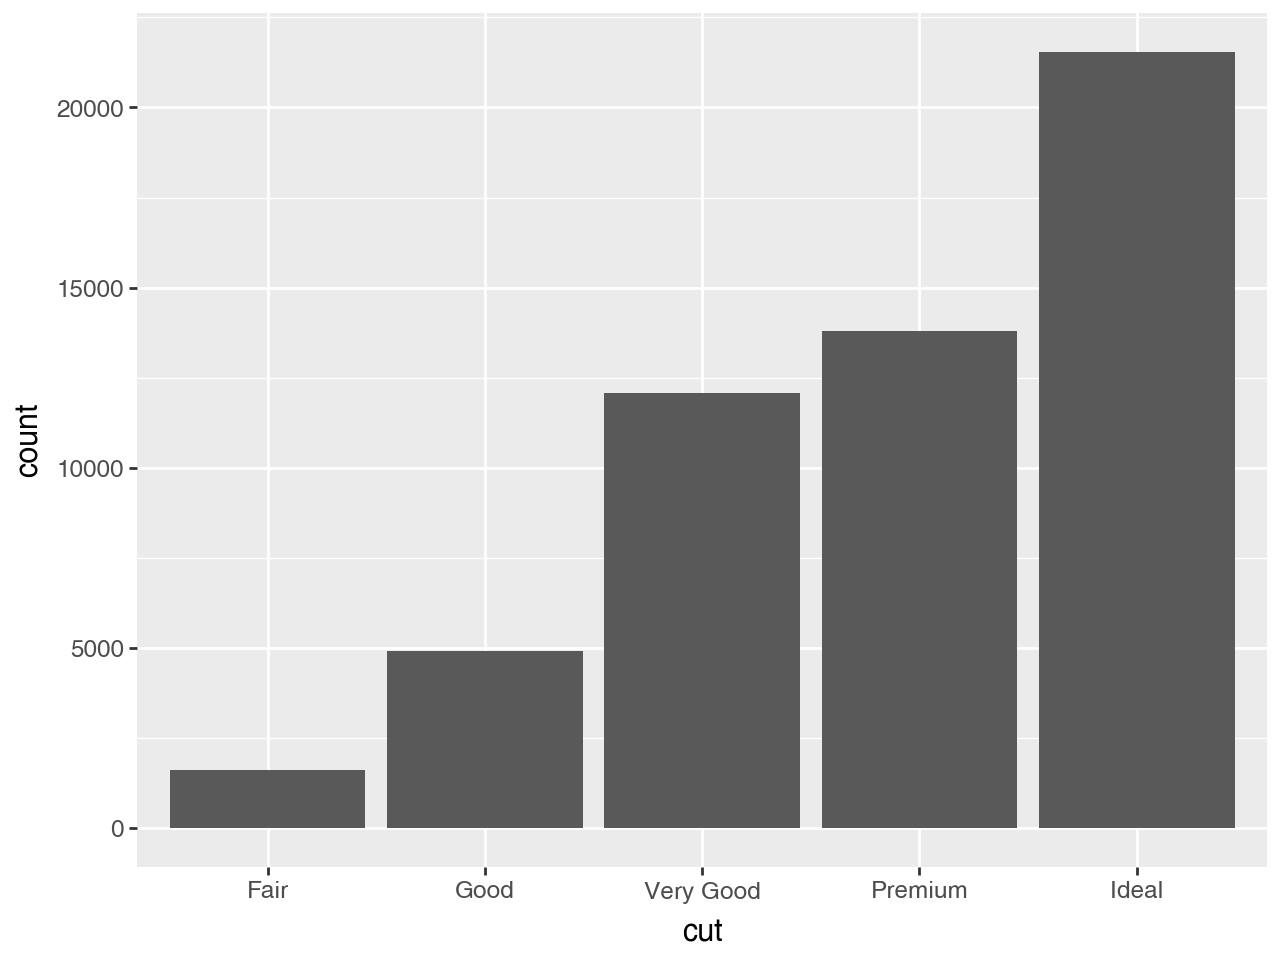

In [11]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut'))

* Η γεωμετρία `geom_bar()` καταμετρά τον αριθμό των παρατηρήσεων σε κάθε κατηγορία.

* Οπότε υλοποιεί μια είδους στατιστικής μετρικής και μπορούμε να πάρουμε το ίδιο αποτέλεσμα δίνοντας `stat_count()`.

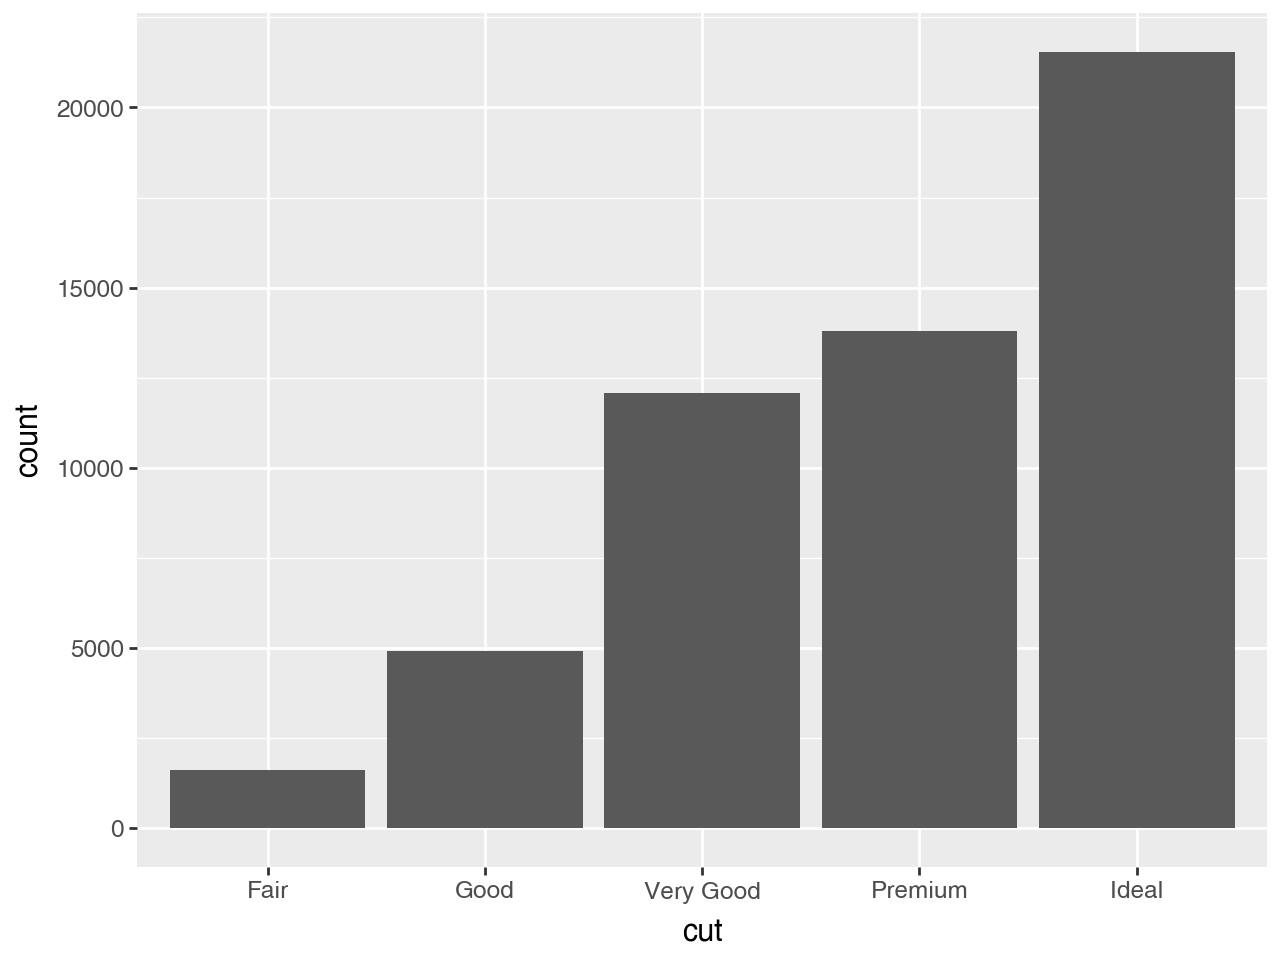

In [12]:
ggplot(data=diamonds) + \
    stat_count(mapping=aes(x='cut'))

* Στο seaborn αντίστοιχα:

<Axes: xlabel='cut', ylabel='count'>

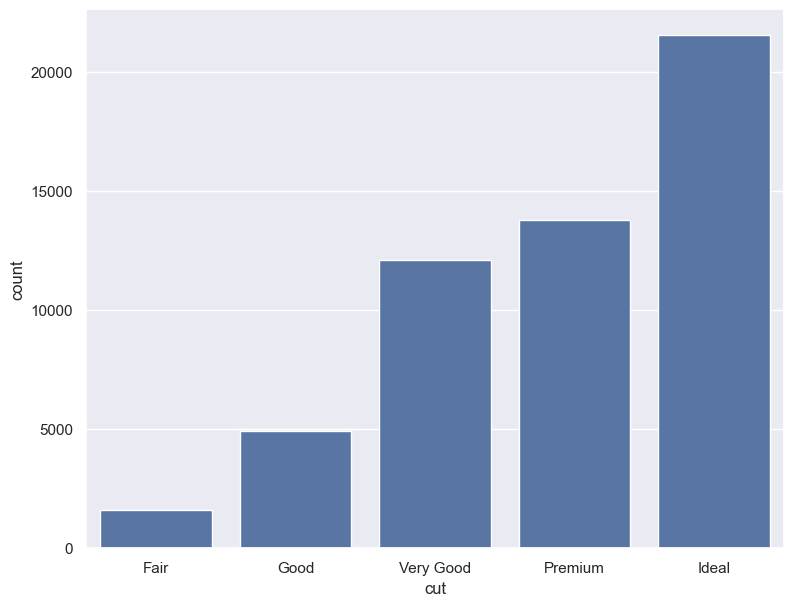

In [13]:
sns.set_style('dark')
sns.set_theme(rc={'figure.figsize':(9, 7)})
sns.countplot(x='cut', data=diamonds)

* Μερικές φορές τα δεδομένα μας έρχονται ήδη καταμετρημένα σε κατηγορίες, όπως:

In [15]:
counted = diamonds.groupby('cut', observed=True).size().to_frame(name='freq').reset_index()
counted

,cut,freq
0,Fair,1610
1,Good,4906
2,Very Good,12082
3,Premium,13791
4,Ideal,21551


* Για να απεικονίσουμε τα δεδομένα μας σε ραβδόγραμμα όταν έρχονται σε αυτήν τη μορφή, πρέπει να δηλώσουμε ότι η στατιστική μετρική είναι ταυτοτική (`identity`).

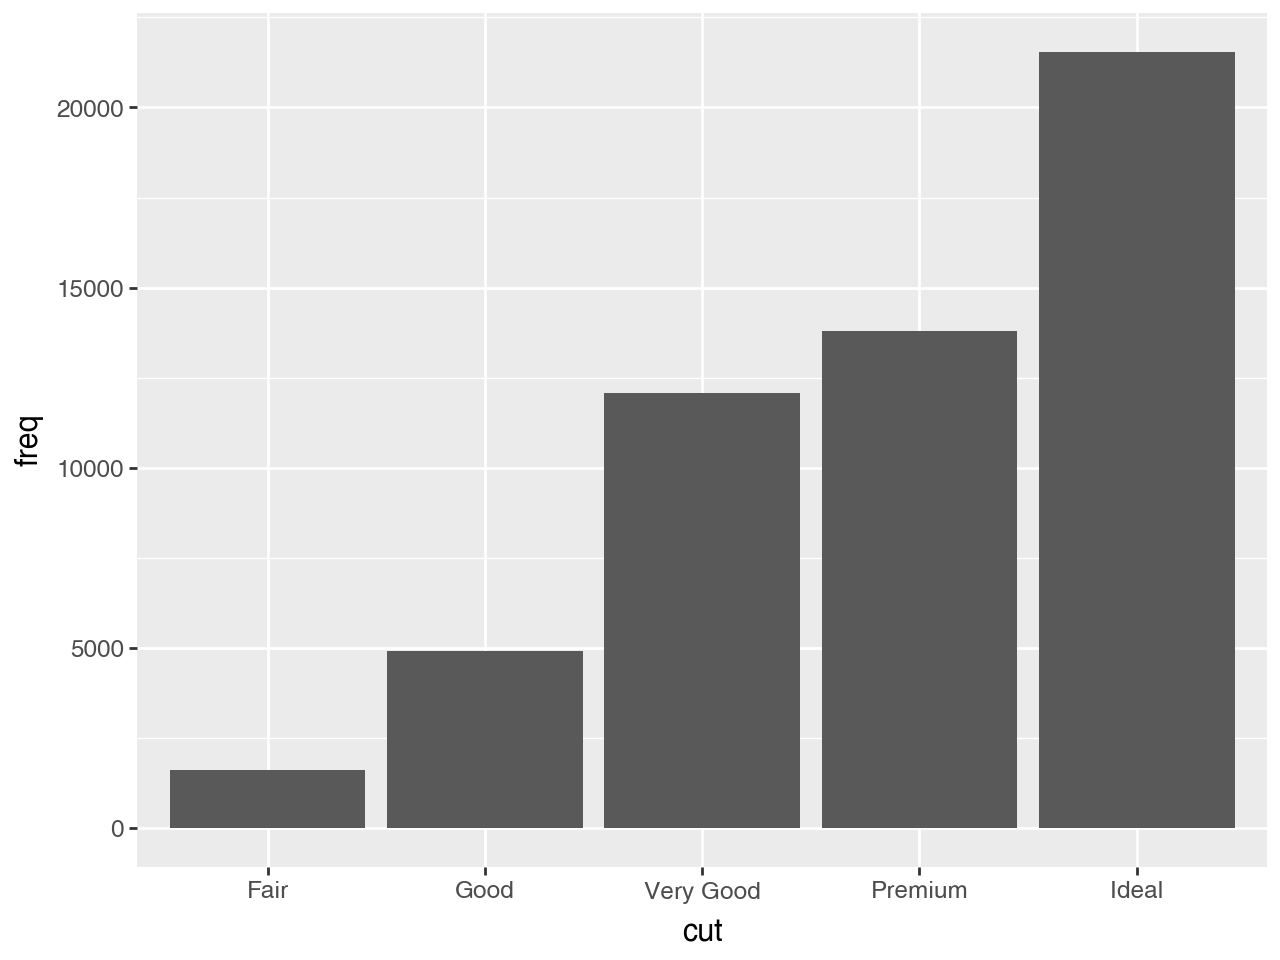

In [16]:
ggplot(data=counted) + \
    geom_bar(mapping=aes(x='cut', y='freq'), stat="identity")

* Και στο seaborn:

<Axes: xlabel='cut', ylabel='freq'>

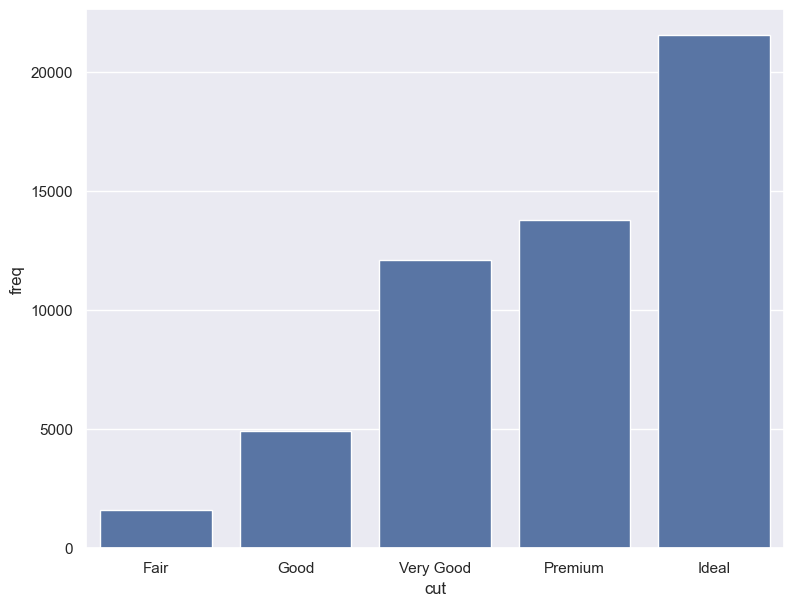

In [17]:
sns.barplot(x='cut', y='freq', data=counted)

* Αν θέλουμε να πάρουμε *ποσοστά* αντί για απόλυτους αριθμούς στο ggplot2, θα δώσουμε:

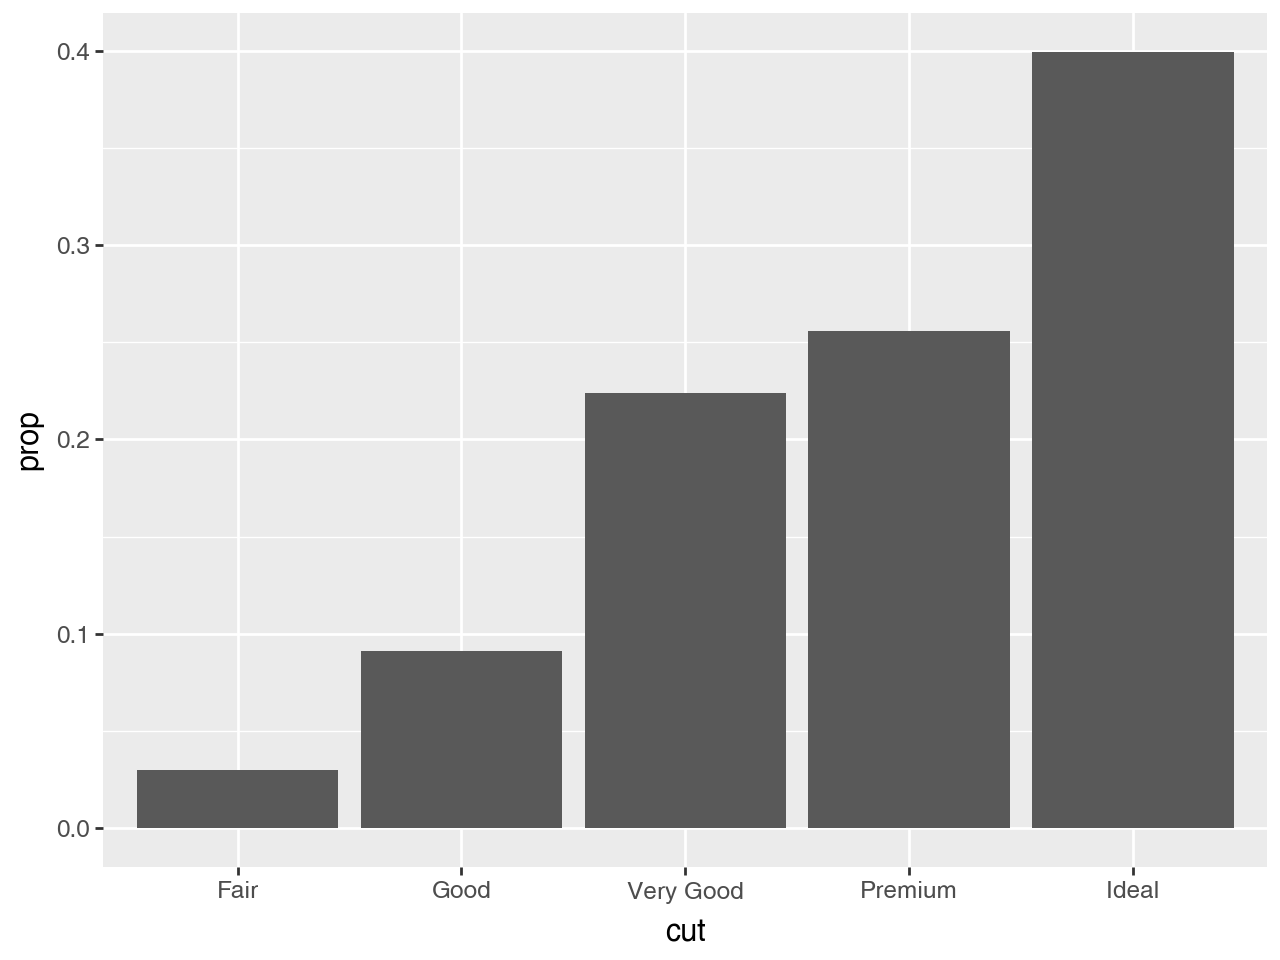

In [18]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', y="stat(prop)", group=1))

* Κάτι ενδιαφέρον είναι ότι στο ggplot2 μπορούμε να σχεδιάσουμε οποιαδήποτε στατιστική μετρική μέσω του `stat_summary()` και δίνοντας τις κατάλληλες παραμέτρους.

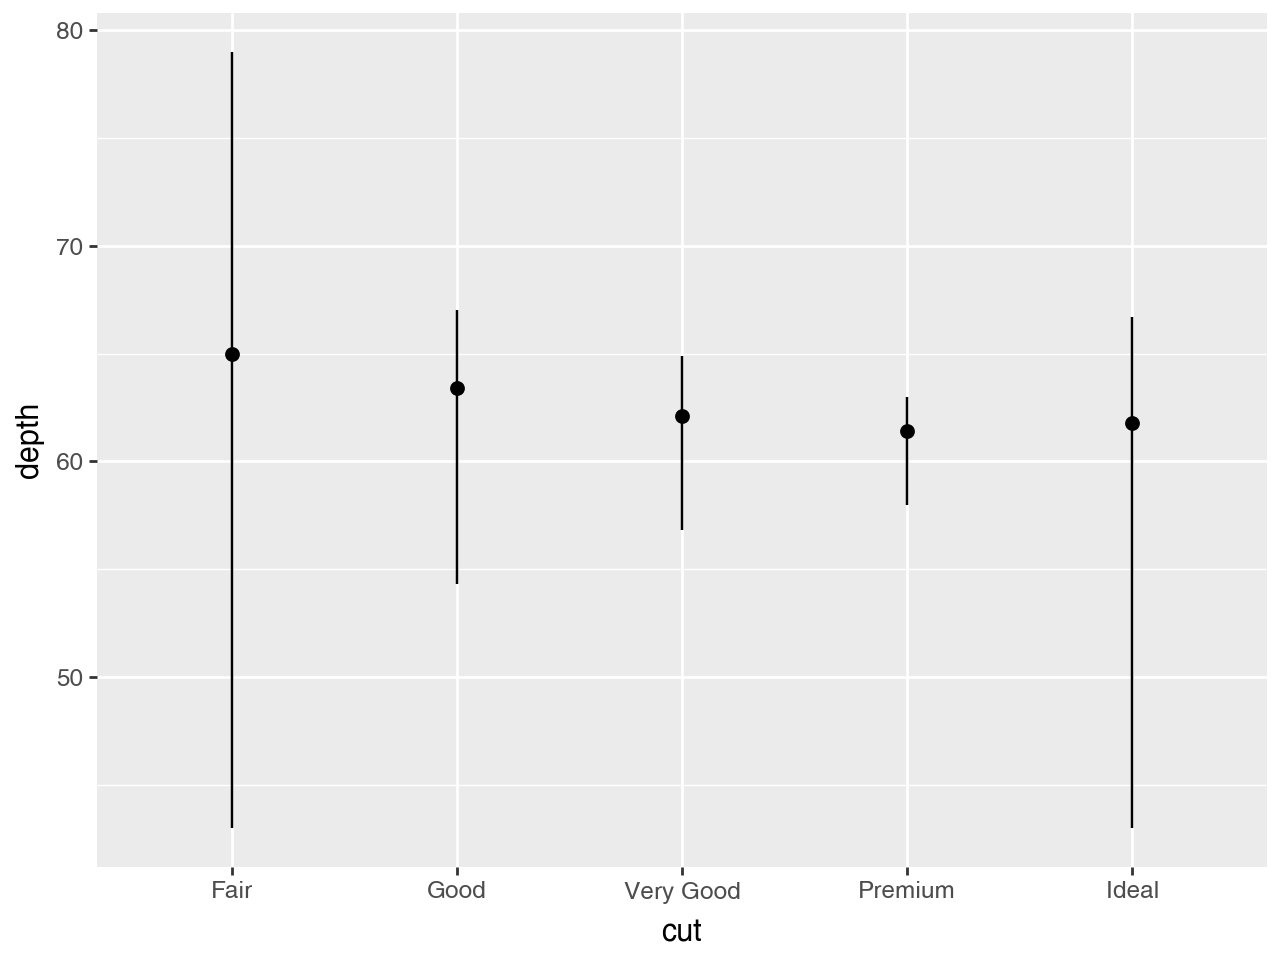

In [19]:
import numpy as np

ggplot(data = diamonds) + \
    stat_summary(mapping=aes(x='cut', y='depth'),
        fun_ymin=np.min, fun_ymax=np.max, fun_y=np.median)

* Πάμε πίσω στα ραβδογράμματα, όπου μπορούμε να προσθέσουμε μια επιπλέον διάσταση χρησιμοποιώντας διαφορετικά χρώματα.

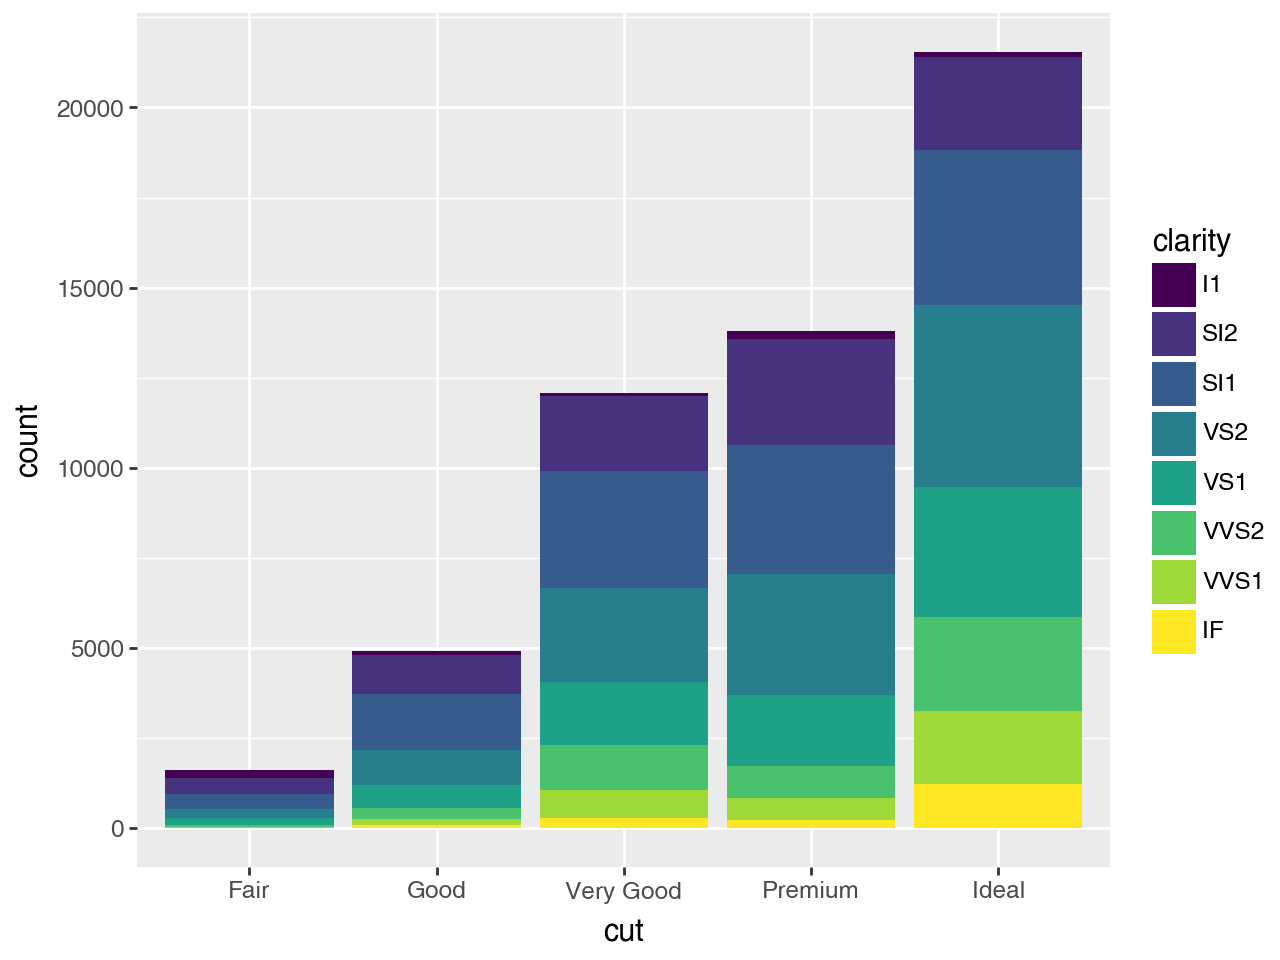

In [20]:
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'))

* Μπορούμε να πάρουμε το ίδιο αποτέλεσμα δίνοντας `position='stack'`.

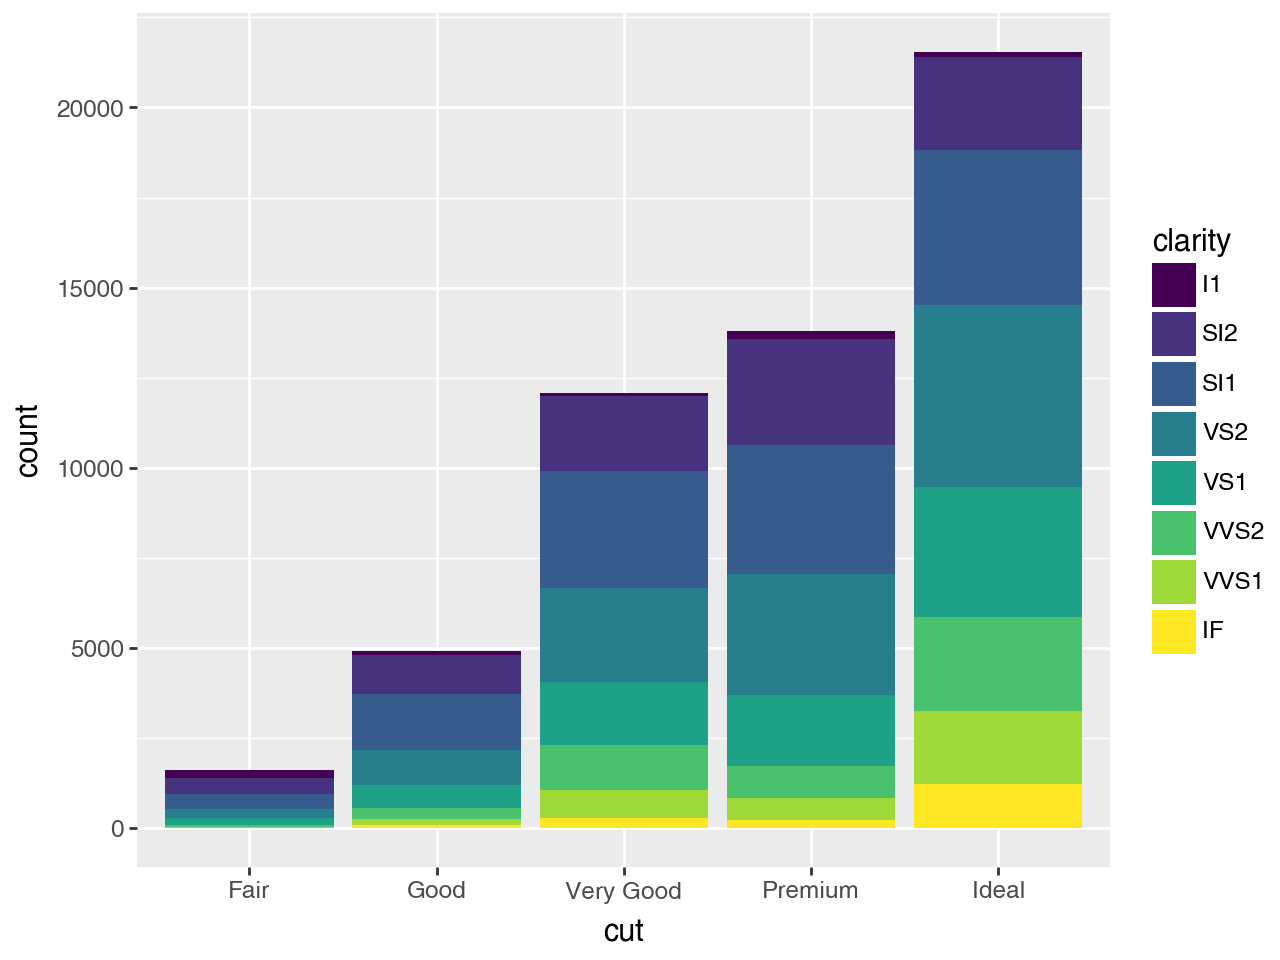

In [21]:
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'), position='stack')

* Αν εναλλακτικά χρησιμοποιήσουμε `position='fill'`, τα χρώματα θα αθροίζουν στο ένα.

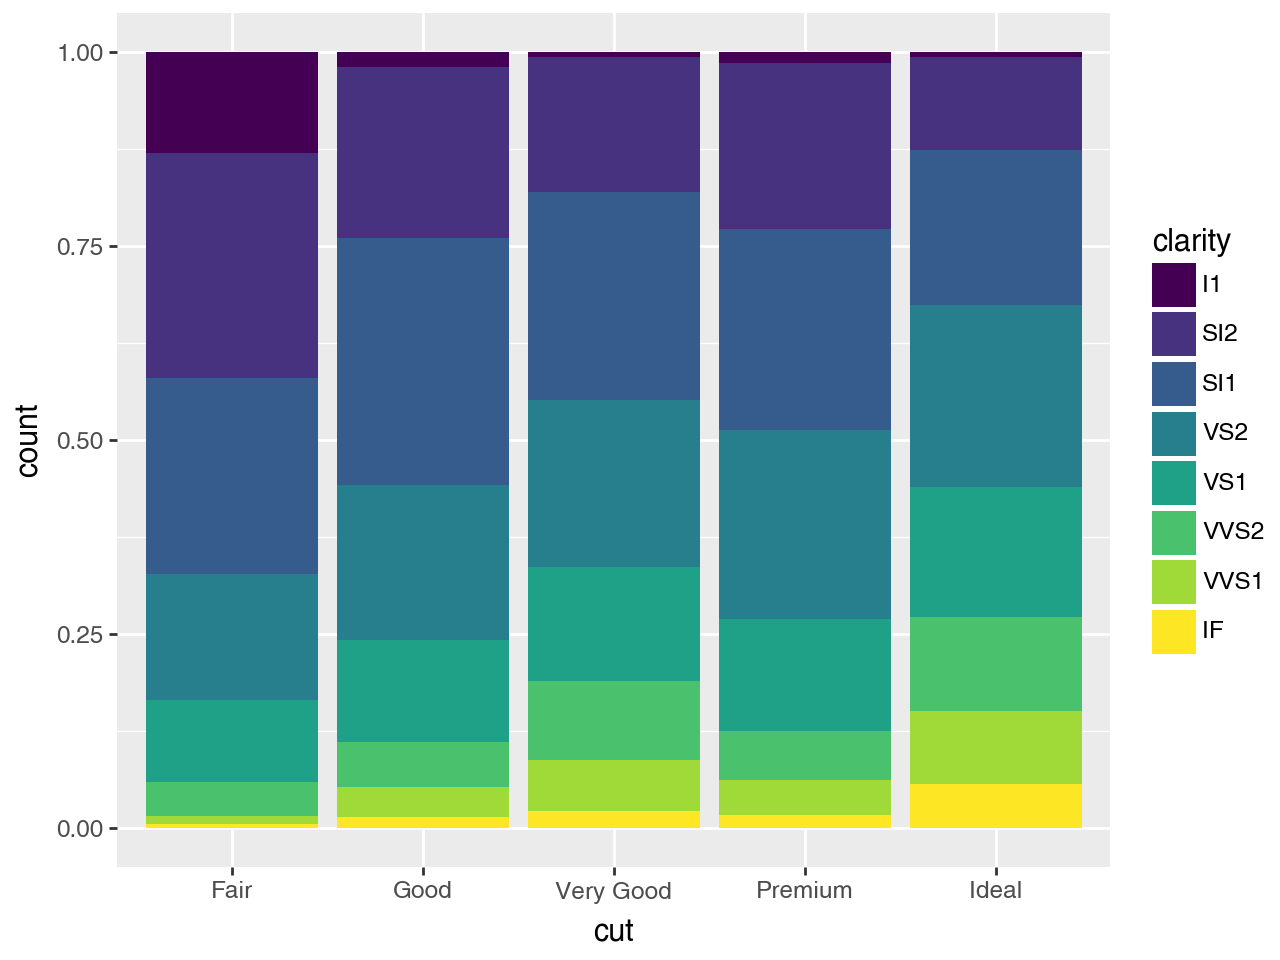

In [22]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='fill')

* Αν προτιμούμε οι ράβδοι να μπουν πλάι-πλάι, μπορούμε να δώσουμε `position='dodge'`.

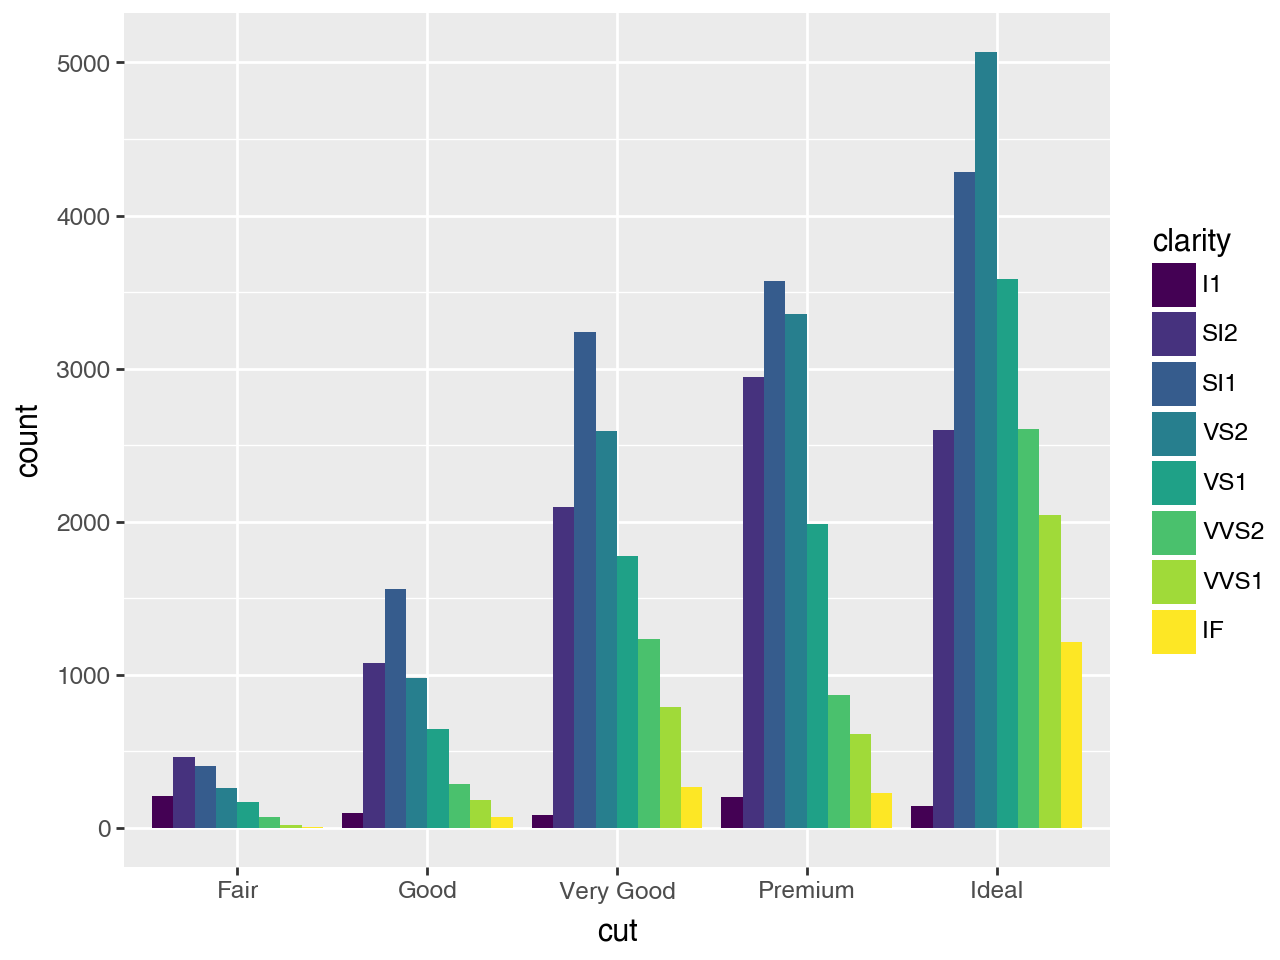

In [23]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='dodge')

* Μπορούμε να πάρουμε το ίδιο αποτέλεσμα στο seaborn με το `countplot()`.

<Axes: xlabel='cut', ylabel='count'>

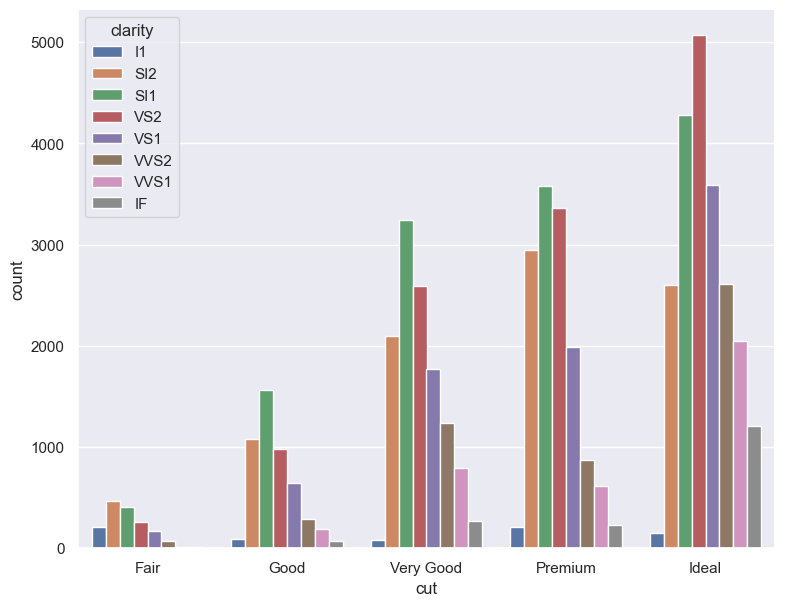

In [24]:
sns.countplot(x='cut', hue='clarity', data=diamonds)

* Να επιστρέψουμε τώρα λίγο στα δεδομένα των αυτοκινήτων.

* Μάλιστα, αυτή τη φορά θα χρησιμοποιήσουμε το μικρό σύνολο δεδομένων.

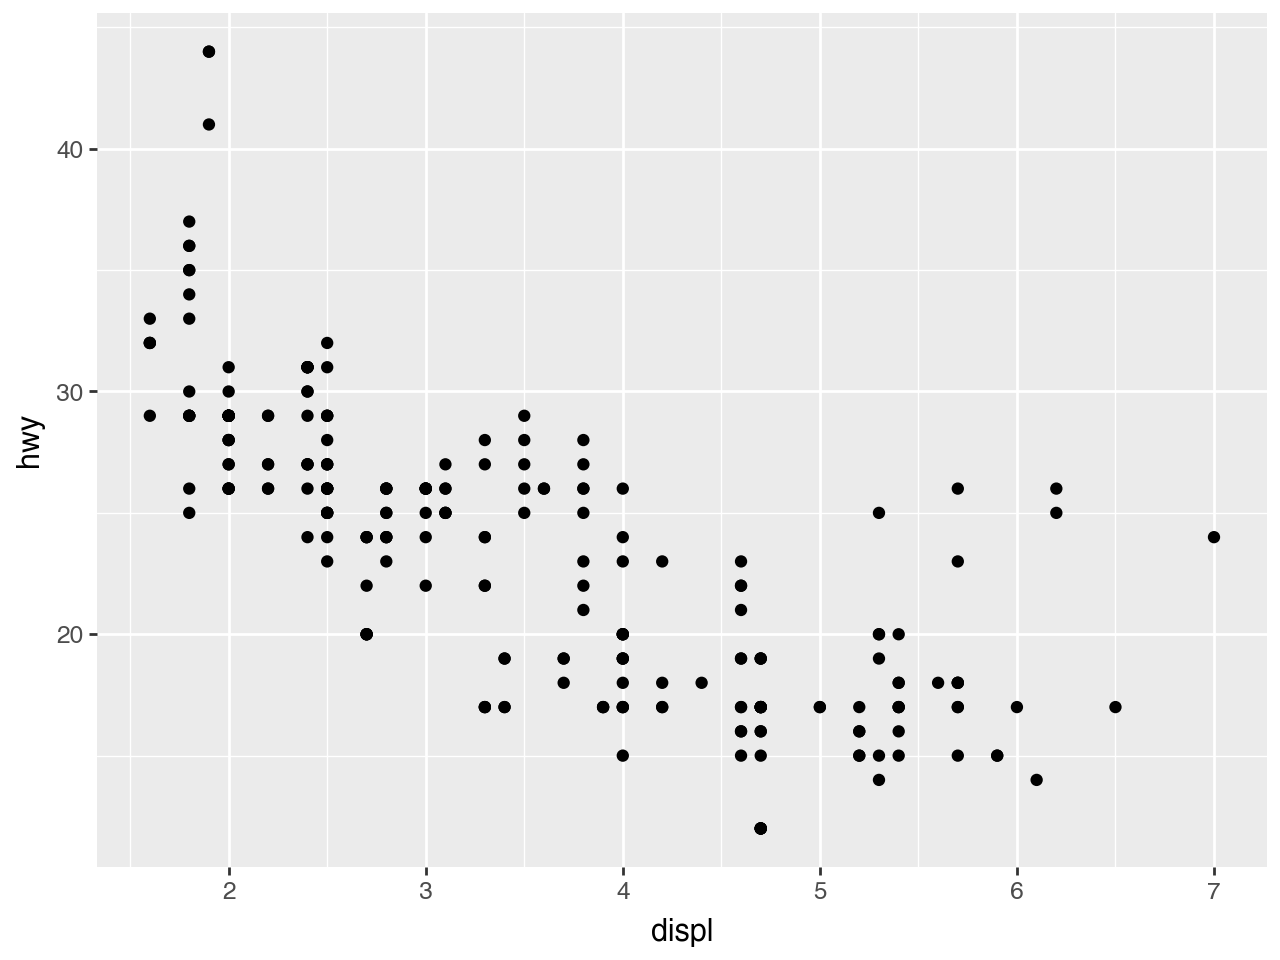

In [25]:
from plotnine.data import mpg

ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'))

* Για να αποφύγουμε τις περιπτώσεις που οι παρατηρήσεις πέφτουν η μία πάνω στην άλλη, μπορούμε να χρησιμοποιήσουμε την παράμετρο`position='jitter'`.

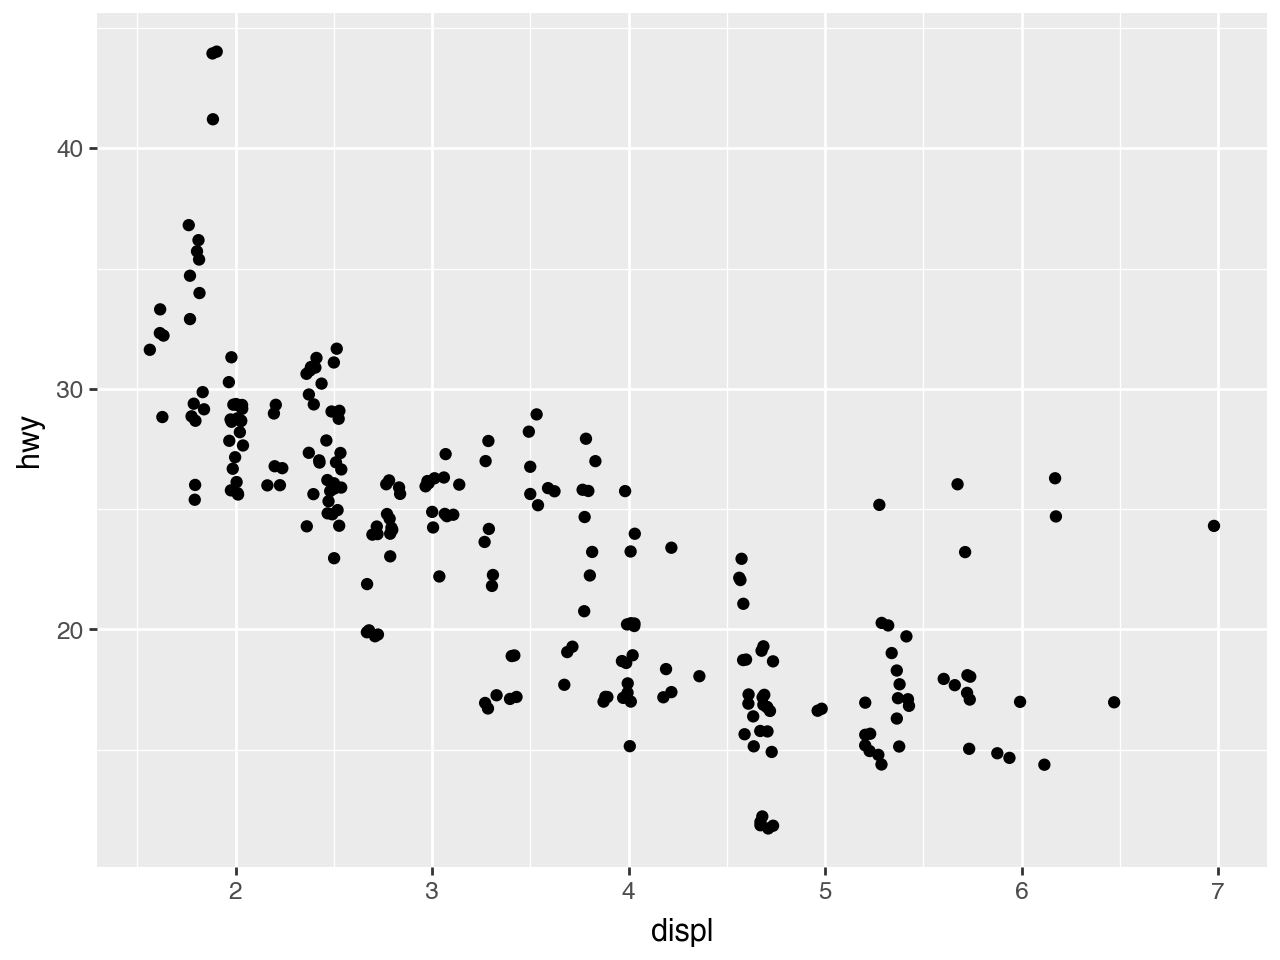

In [26]:
ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), position='jitter')

* Για να κλείσουμε, να δούμε την κατανάλωση ανά κλάση μέσω θηκογραμμάτων.

* Πρέπει να διαβάσουμε πάλι τα δεδομένα.

In [27]:
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

fmpg = pd.read_csv('vehicles.csv.zip', usecols=usecols)

In [28]:
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Μετονομάζουμε πάλι τις στήλες:

In [29]:
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Συμμαζεύουμε τον αριθμό των κλάσεων:

In [30]:
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

* Πάμε στα θηκογράμματα.

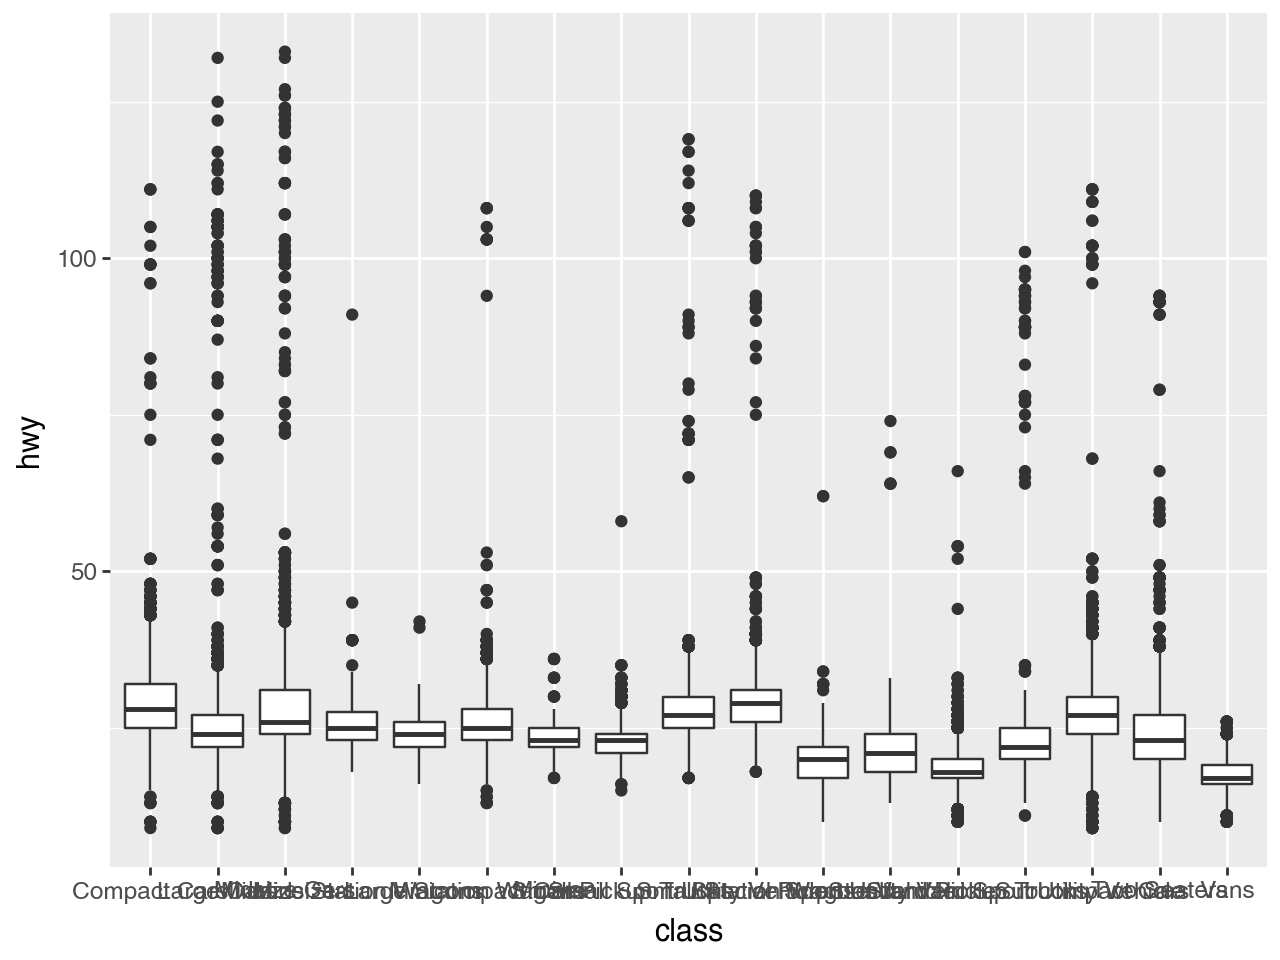

In [31]:
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot()

* Ομοίως στο seaborn.

<Axes: xlabel='class', ylabel='hwy'>

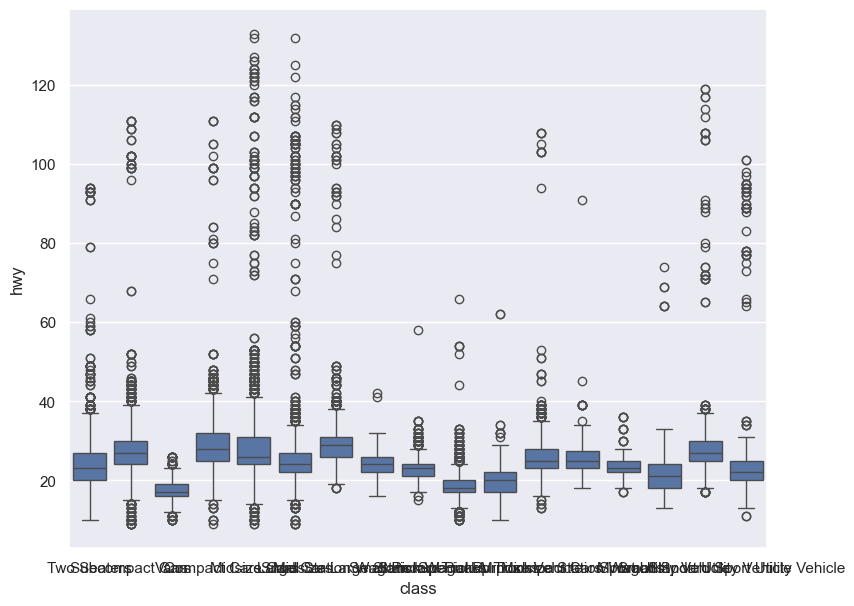

In [32]:
sns.boxplot(x="class", y="hwy", data=fmpg)

* Για να διορθώσουμε το χάλι με τις αλληλοεπικαλυπτόμενες λεζάντες στον οριζόντιο άξονα, αρκεί να αλλάξουμε τις θέσεις των αξόνων.

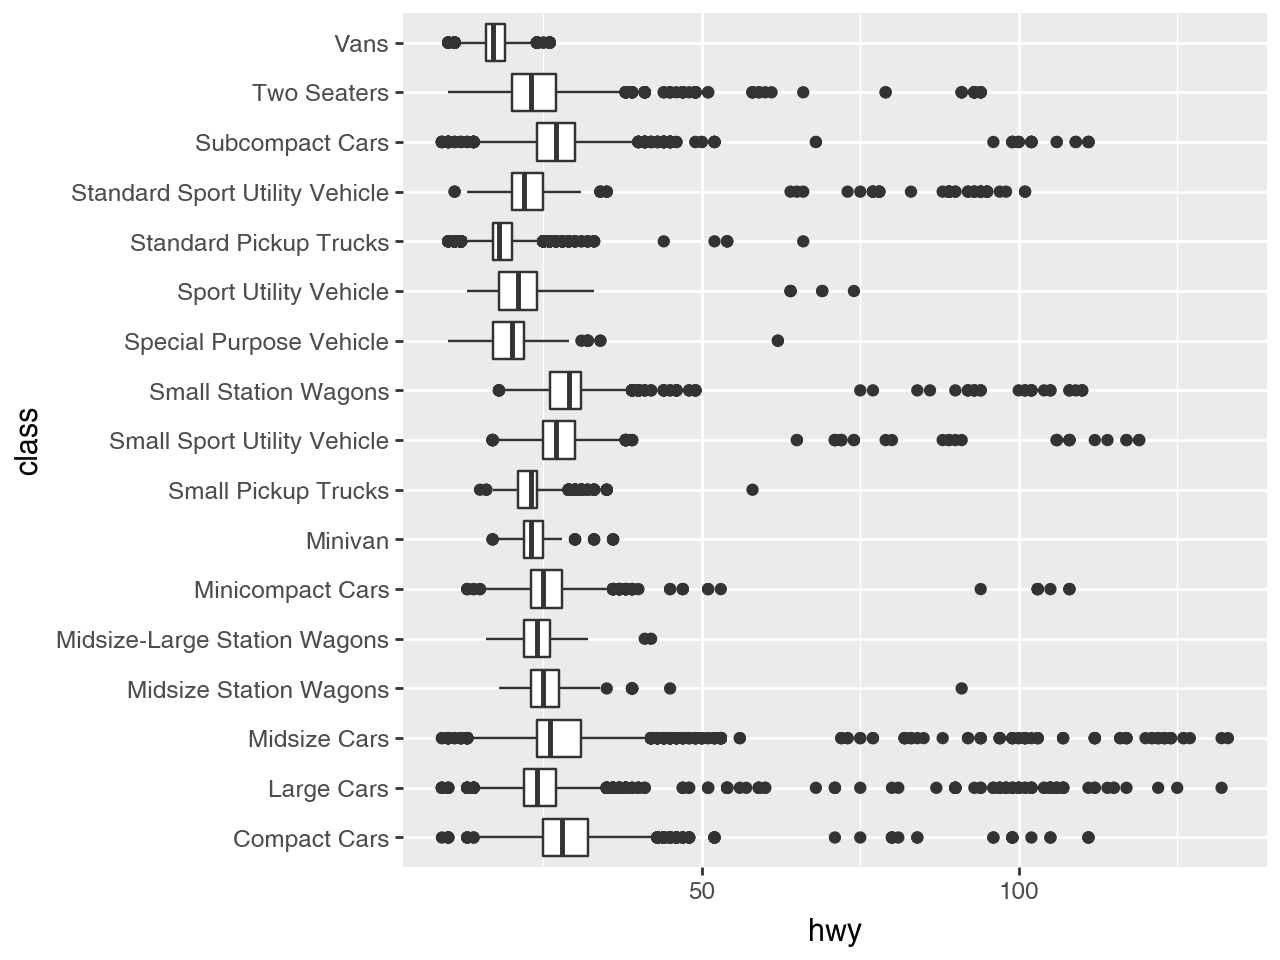

In [33]:
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot() + \
    coord_flip()

* Ομοίως και με το seaborn.

<Axes: xlabel='hwy', ylabel='class'>

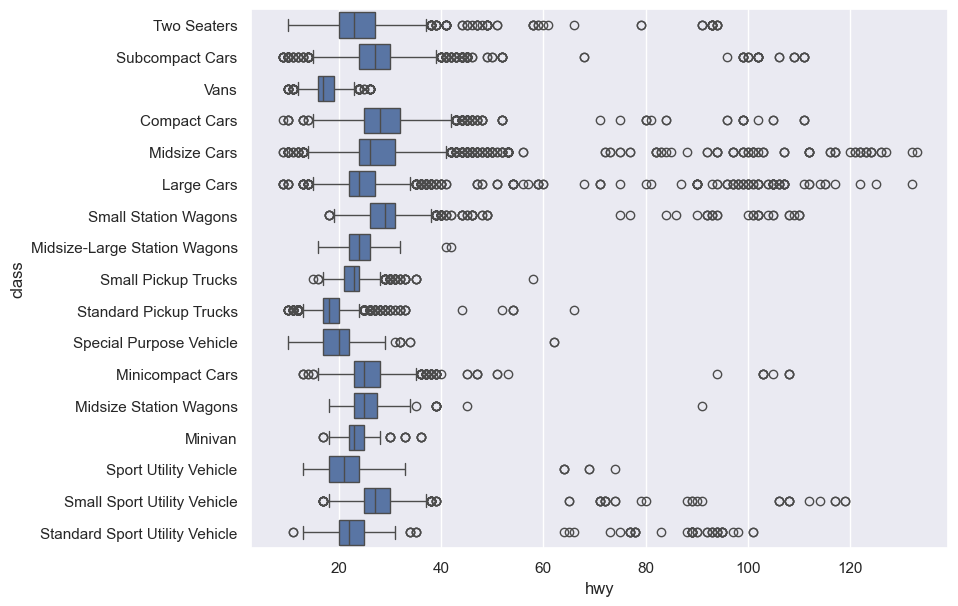

In [34]:
sns.boxplot(x="hwy", y="class", orient='h', data=fmpg)